## Handing Missing Values

In [1]:
import numpy as np
import pandas as pd

In [2]:
nf1_data = pd.read_csv('/home/nux/Desktop/Hands-on-Machine-Learning/NFL Play by Play 2009-2017 (v4).csv')
np.random.seed(0)

/tmp/ipykernel_5553/1623880765.py:1: DtypeWarning: Columns (25,51) have mixed types. Specify dtype option on import or set low_memory=False.
  nf1_data = pd.read_csv('/home/nux/Desktop/Hands-on-Machine-Learning/NFL Play by Play 2009-2017 (v4).csv')


In [3]:
nf1_data.head()

,Date,GameID,Drive,qtr,down,time,TimeUnder,TimeSecs,PlayTimeDiff,SideofField,...,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season
0,2009-09-10,2009091000,1,1,NaN,15:00,15,3600.0,0.0,TEN,...,NaN,0.485675,0.514325,0.546433,0.453567,0.485675,0.060758,NaN,NaN,2009
1,2009-09-10,2009091000,1,1,1.0,14:53,15,3593.0,7.0,PIT,...,1.146076,0.546433,0.453567,0.551088,0.448912,0.546433,0.004655,-0.032244,0.036899,2009
2,2009-09-10,2009091000,1,1,2.0,14:16,15,3556.0,37.0,PIT,...,NaN,0.551088,0.448912,0.510793,0.489207,0.551088,-0.040295,NaN,NaN,2009
3,2009-09-10,2009091000,1,1,3.0,13:35,14,3515.0,41.0,PIT,...,-5.031425,0.510793,0.489207,0.461217,0.538783,0.510793,-0.049576,0.106663,-0.156239,2009
4,2009-09-10,2009091000,1,1,4.0,13:27,14,3507.0,8.0,PIT,...,NaN,0.461217,0.538783,0.558929,0.441071,0.461217,0.097712,NaN,NaN,2009


In [4]:
nf1_data.tail(10)

,Date,GameID,Drive,qtr,down,time,TimeUnder,TimeSecs,PlayTimeDiff,SideofField,...,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season
407678,2017-12-31,2017123101,28,4,4.0,00:53,1,53.0,0.0,BAL,...,3.985291,0.909407,0.090593,0.146199,0.853801,0.090593,0.763208,0.200225,0.562983,2017
407679,2017-12-31,2017123101,28,4,NaN,00:44,1,44.0,9.0,BAL,...,NaN,0.146199,0.853801,0.227981,0.772019,0.853801,-0.081781,NaN,NaN,2017
407680,2017-12-31,2017123101,29,4,NaN,00:44,1,44.0,0.0,CIN,...,NaN,0.227981,0.772019,0.202212,0.797788,0.227981,-0.025769,NaN,NaN,2017
407681,2017-12-31,2017123101,29,4,1.0,00:38,1,38.0,6.0,BAL,...,0.245803,0.202212,0.797788,0.169366,0.830634,0.202212,-0.032846,-0.057752,0.024906,2017
407682,2017-12-31,2017123101,29,4,2.0,00:32,1,32.0,6.0,BAL,...,NaN,0.169366,0.830634,0.080409,0.919591,0.169366,-0.088957,NaN,NaN,2017
407683,2017-12-31,2017123101,29,4,NaN,00:28,1,28.0,4.0,BAL,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,2017
407684,2017-12-31,2017123101,29,4,3.0,00:28,1,28.0,0.0,BAL,...,-0.397515,0.080409,0.919591,0.050478,0.949522,0.080409,-0.029931,-0.021795,-0.008136,2017
407685,2017-12-31,2017123101,29,4,4.0,00:24,1,24.0,4.0,BAL,...,2.457114,0.050478,0.949522,0.030881,0.969119,0.050478,-0.019597,-0.030603,0.011006,2017
407686,2017-12-31,2017123101,30,4,1.0,00:14,1,14.0,10.0,BAL,...,NaN,0.030881,0.969119,0.000000,1.000000,0.969119,0.030881,NaN,NaN,2017
407687,2017-12-31,2017123101,30,4,NaN,00:00,0,0.0,14.0,BAL,...,NaN,0.000000,1.000000,0.000000,1.000000,0.999159,0.000000,NaN,NaN,2017


In [5]:
missing_value_count = nf1_data.isnull().sum()

# looking missing pints in the first ten columns
missing_value_count[0:10]

Date                0
GameID              0
Drive               0
qtr                 0
down            61154
time              224
TimeUnder           0
TimeSecs          224
PlayTimeDiff      444
SideofField       528
dtype: int64

In [6]:
# how many total missing value do we have ?
total_cells = np.product(nf1_data.shape)
total_missing = missing_value_count.sum()

# percent of data that is missing
percent_missing = (total_missing / total_cells) * 100
print(percent_missing)

24.87214126835169


In [7]:
## remove all the rows that contain a missing value
## nf1_data.dropna()

# remove all columns with at least one missing value
columns_with_na_dropped = nf1_data.dropna(axis=1)
columns_with_na_dropped.head()

,Date,GameID,Drive,qtr,TimeUnder,ydstogo,ydsnet,PlayAttempted,Yards.Gained,sp,...,Timeout_Indicator,Timeout_Team,posteam_timeouts_pre,HomeTimeouts_Remaining_Pre,AwayTimeouts_Remaining_Pre,HomeTimeouts_Remaining_Post,AwayTimeouts_Remaining_Post,ExPoint_Prob,TwoPoint_Prob,Season
0,2009-09-10,2009091000,1,1,15,0,0,1,39,0,...,0,None,3,3,3,3,3,0.0,0.0,2009
1,2009-09-10,2009091000,1,1,15,10,5,1,5,0,...,0,None,3,3,3,3,3,0.0,0.0,2009
2,2009-09-10,2009091000,1,1,15,5,2,1,-3,0,...,0,None,3,3,3,3,3,0.0,0.0,2009
3,2009-09-10,2009091000,1,1,14,8,2,1,0,0,...,0,None,3,3,3,3,3,0.0,0.0,2009
4,2009-09-10,2009091000,1,1,14,8,2,1,0,0,...,0,None,3,3,3,3,3,0.0,0.0,2009


In [8]:
# just how much data did we lose

print("Columns in original dataset:  %d \n" % nf1_data.shape[1])
print("Columns in na's dropped:  %d \n" % columns_with_na_dropped.shape[1])

Columns in original dataset:  102 

Columns in na's dropped:  41 



In [9]:
# Goal: filling missing value automatically

# get a small subset of the NFL dataset
subset_nf1_data = nf1_data.loc[:, 'EPA':'Season'].head()
subset_nf1_data_2 = subset_nf1_data
subset_nf1_data_2


,EPA,airEPA,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season
0,2.014474,NaN,NaN,0.485675,0.514325,0.546433,0.453567,0.485675,0.060758,NaN,NaN,2009
1,0.077907,-1.068169,1.146076,0.546433,0.453567,0.551088,0.448912,0.546433,0.004655,-0.032244,0.036899,2009
2,-1.402760,NaN,NaN,0.551088,0.448912,0.510793,0.489207,0.551088,-0.040295,NaN,NaN,2009
3,-1.712583,3.318841,-5.031425,0.510793,0.489207,0.461217,0.538783,0.510793,-0.049576,0.106663,-0.156239,2009
4,2.097796,NaN,NaN,0.461217,0.538783,0.558929,0.441071,0.461217,0.097712,NaN,NaN,2009


In [10]:
# replacing the NAN values with 0
subset_nf1_data_2.fillna(0)

,EPA,airEPA,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season
0,2.014474,0.000000,0.000000,0.485675,0.514325,0.546433,0.453567,0.485675,0.060758,0.000000,0.000000,2009
1,0.077907,-1.068169,1.146076,0.546433,0.453567,0.551088,0.448912,0.546433,0.004655,-0.032244,0.036899,2009
2,-1.402760,0.000000,0.000000,0.551088,0.448912,0.510793,0.489207,0.551088,-0.040295,0.000000,0.000000,2009
3,-1.712583,3.318841,-5.031425,0.510793,0.489207,0.461217,0.538783,0.510793,-0.049576,0.106663,-0.156239,2009
4,2.097796,0.000000,0.000000,0.461217,0.538783,0.558929,0.441071,0.461217,0.097712,0.000000,0.000000,2009


In [11]:
## repalce all NA's the value that comes directly after it in the same column
## then replace all the remaing na's with 0

subset_nf1_data_1 = nf1_data.loc[:, 'down':'yacEPA'].head()
subset_nf1_data_1.fillna(method='bfill', axis=0).fillna(0)


,down,time,TimeUnder,TimeSecs,PlayTimeDiff,SideofField,yrdln,yrdline100,ydstogo,ydsnet,...,Opp_Touchdown_Prob,Field_Goal_Prob,Safety_Prob,Touchdown_Prob,ExPoint_Prob,TwoPoint_Prob,ExpPts,EPA,airEPA,yacEPA
0,1.0,15:00,15,3600.0,0.0,TEN,30.0,30.0,0,0,...,0.281138,0.213700,0.003592,0.313676,0.0,0.0,0.323526,2.014474,-1.068169,1.146076
1,1.0,14:53,15,3593.0,7.0,PIT,42.0,58.0,10,5,...,0.169117,0.293700,0.003638,0.423011,0.0,0.0,2.338000,0.077907,-1.068169,1.146076
2,2.0,14:16,15,3556.0,37.0,PIT,47.0,53.0,5,2,...,0.162747,0.304805,0.003826,0.421478,0.0,0.0,2.415907,-1.402760,3.318841,-5.031425
3,3.0,13:35,14,3515.0,41.0,PIT,44.0,56.0,8,2,...,0.234801,0.289336,0.004776,0.318621,0.0,0.0,1.013147,-1.712583,3.318841,-5.031425
4,4.0,13:27,14,3507.0,8.0,PIT,44.0,56.0,8,2,...,0.322262,0.244603,0.006404,0.208111,0.0,0.0,-0.699436,2.097796,0.000000,0.000000


## Scaling and Normalizing

* In scaling, you're changing the range of your data,
 
* In normalization, you're changing the shape of the distribution of your data.

In [12]:
from mlxtend.preprocessing import minmax_scaling
import matplotlib.pyplot as plt
import seaborn as sns

#### Scaling

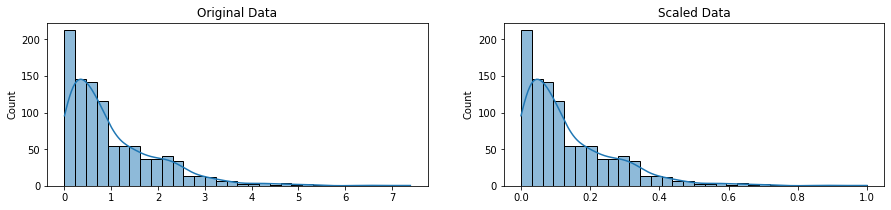

In [22]:
# Generate 1000 data points randomly
original_data = np.random.exponential(size=1000)

# min-max scaling the data between 0 and 1
scaled_data = minmax_scaling(original_data, columns=[0])

# plot both together to compare
fig, ax  = plt.subplots(1, 2, figsize=(15,3))
sns.histplot(original_data, ax=ax[0], kde=True, legend=False)
ax[0].set_title('Original Data')
sns.histplot(scaled_data, ax=ax[1], kde=True, legend=False)
ax[1].set_title('Scaled Data')
plt.show()


#### Normalization

In [23]:
# for Box-Cox  transformation
from scipy import stats

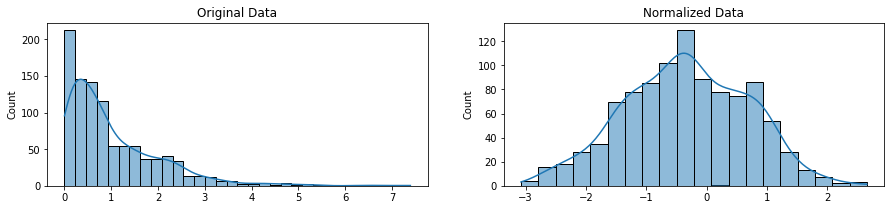

In [24]:
normalized_data = stats.boxcox(original_data)

# plot both together to compare
fig, ax = plt.subplots(1, 2, figsize=(15,3))
sns.histplot(original_data, ax=ax[0], kde=True, legend = False)
ax[0].set_title('Original Data')
sns.histplot(normalized_data, ax=ax[1], kde=True, legend = False)
ax[1].set_title('Normalized Data')
plt.show()

# Parsing Dates

In [25]:
import datetime

In [26]:
landslides = pd.read_csv('/home/nux/Desktop/Hands-on-Machine-Learning/catalog.csv')


In [27]:
landslides.head()

,id,date,time,continent_code,country_name,country_code,state/province,population,city/town,distance,...,geolocation,hazard_type,landslide_type,landslide_size,trigger,storm_name,injuries,fatalities,source_name,source_link
0,34,3/2/07,Night,NaN,United States,US,Virginia,16000,Cherry Hill,3.40765,...,"(38.600900000000003, -77.268199999999993)",Landslide,Landslide,Small,Rain,NaN,NaN,NaN,NBC 4 news,http://www.nbc4.com/news/11186871/detail.html
1,42,3/22/07,NaN,NaN,United States,US,Ohio,17288,New Philadelphia,3.33522,...,"(40.517499999999998, -81.430499999999995)",Landslide,Landslide,Small,Rain,NaN,NaN,NaN,Canton Rep.com,http://www.cantonrep.com/index.php?ID=345054&C...
2,56,4/6/07,NaN,NaN,United States,US,Pennsylvania,15930,Wilkinsburg,2.91977,...,"(40.4377, -79.915999999999997)",Landslide,Landslide,Small,Rain,NaN,NaN,NaN,The Pittsburgh Channel.com,https://web.archive.org/web/20080423132842/htt...
3,59,4/14/07,NaN,NaN,Canada,CA,Quebec,42786,Châteauguay,2.98682,...,"(45.322600000000001, -73.777100000000004)",Landslide,Riverbank collapse,Small,Rain,NaN,NaN,NaN,Le Soleil,http://www.hebdos.net/lsc/edition162007/articl...
4,61,4/15/07,NaN,NaN,United States,US,Kentucky,6903,Pikeville,5.66542,...,"(37.432499999999997, -82.493099999999998)",Landslide,Landslide,Small,Downpour,NaN,NaN,0.0,Matthew Crawford (KGS),NaN


In this section we'll be working with 'date' column from the **landslides** dataframe.

In [29]:
# print the first few rows of the date columns
landslides['date'].head()

0     3/2/07
1    3/22/07
2     4/6/07
3    4/14/07
4    4/15/07
Name: date, dtype: object

Format

* 1/17/07 has the format "%m/%d/%y"
* 17-1-2007 has the format "%d-%m-%Y"


* 'y' for two digit year, 'Y' for four digit year

In [35]:
landslides['date_parsed'] = pd.to_datetime(landslides['date'], format='%m/%d/%y')

In [36]:
landslides['date_parsed'].head()

0   2007-03-02
1   2007-03-22
2   2007-04-06
3   2007-04-14
4   2007-04-15
Name: date_parsed, dtype: datetime64[ns]

In [37]:
# extract day of month 
day_of_month_landslides = landslides['date_parsed'].dt.day
day_of_month_landslides.head()

0     2.0
1    22.0
2     6.0
3    14.0
4    15.0
Name: date_parsed, dtype: float64

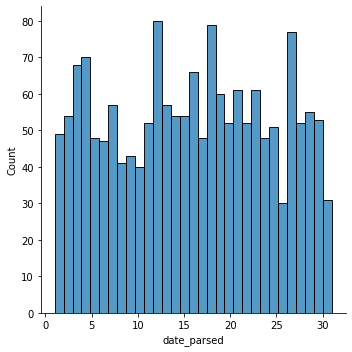

In [43]:
# plot the days

# remove the na's
day_of_month_landslides = day_of_month_landslides.dropna()

# plot
sns.displot(day_of_month_landslides, kde=False, bins=31)

# Charcter Encoding

Character encodings are specific sets of rules for mapping from raw binary byte strings (that look like this: 0110100001101001) to characters that make up human-readable text (like "hi"). 

In [46]:
import chardet

In [44]:
# start with a string
before = "This is the euro symbol: €"

# check to see what datatype it is
type(before)

str

In [48]:
# encode it to a different encoding, replacing characters that raise errors
after = before.encode('utf-8', errors='replace')

# check the type
type(after)


bytes

In [49]:
after

b'This is the euro symbol: \xe2\x82\xac'

In [50]:
print(after.decode('utf-8'))

This is the euro symbol: €


In [51]:
# start with a string
before = "This is the euro symbol: €"

# encode it to a different encoding, replacing characters that raise errors
after = before.encode("ascii", errors = "replace")

# convert it back to utf-8
print(after.decode("ascii"))

This is the euro symbol: ?


In [52]:
# look at the first ten thousand bytes to guess the character encoding
'''
with open("dataset.csv", 'rb') as rawdata:
    result = chardet.detect(rawdata.read(10000))

# check what the character encoding might be
print(result)

'''

'\nwith open("dataset.csv", \'rb\') as rawdata:\n    result = chardet.detect(rawdata.read(10000))\n\n# check what the character encoding might be\nprint(result)\n\n'

# Inconsistent Data Entry

In [54]:
import fuzzywuzzy
from fuzzywuzzy import process

/home/nux/Desktop/Hands-on-Machine-Learning/venv/lib/python3.10/site-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [58]:
professors = pd.read_csv('/home/nux/Desktop/Hands-on-Machine-Learning/pakistan_intellectual_capital.csv')

In [59]:
professors.head()

,Unnamed: 0,S#,Teacher Name,University Currently Teaching,Department,Province University Located,Designation,Terminal Degree,Graduated from,Country,Year,Area of Specialization/Research Interests,Other Information
0,2,3,Dr. Abdul Basit,University of Balochistan,Computer Science & IT,Balochistan,Assistant Professor,PhD,Asian Institute of Technology,Thailand,NaN,Software Engineering & DBMS,NaN
1,4,5,Dr. Waheed Noor,University of Balochistan,Computer Science & IT,Balochistan,Assistant Professor,PhD,Asian Institute of Technology,Thailand,NaN,DBMS,NaN
2,5,6,Dr. Junaid Baber,University of Balochistan,Computer Science & IT,Balochistan,Assistant Professor,PhD,Asian Institute of Technology,Thailand,NaN,"Information processing, Multimedia mining",NaN
3,6,7,Dr. Maheen Bakhtyar,University of Balochistan,Computer Science & IT,Balochistan,Assistant Professor,PhD,Asian Institute of Technology,Thailand,NaN,"NLP, Information Retrieval, Question Answering...",NaN
4,24,25,Samina Azim,Sardar Bahadur Khan Women's University,Computer Science,Balochistan,Lecturer,BS,Balochistan University of Information Technolo...,Pakistan,2005.0,VLSI Electronics DLD Database,NaN


In [60]:
# get all the unique values in the country column
countries = professors['Country'].unique()

# sort the alphabetically and then take a close look
countries.sort()
countries

array([' Germany', ' New Zealand', ' Sweden', ' USA', 'Australia',
       'Austria', 'Canada', 'China', 'Finland', 'France', 'Greece',
       'HongKong', 'Ireland', 'Italy', 'Japan', 'Macau', 'Malaysia',
       'Mauritius', 'Netherland', 'New Zealand', 'Norway', 'Pakistan',
       'Portugal', 'Russian Federation', 'Saudi Arabia', 'Scotland',
       'Singapore', 'South Korea', 'SouthKorea', 'Spain', 'Sweden',
       'Thailand', 'Turkey', 'UK', 'USA', 'USofA', 'Urbana', 'germany'],
      dtype=object)

Inconsistent ->

* 'germany' and 'Germany'
* ' New zealand' and 'New zealand'


In [61]:
# convert to lower
professors['Country'] = professors['Country'].str.lower()

# remove trailing white space 
professors['Country'] = professors['Country'].str.strip()

In [62]:
# get all the unique values in the 'Country' column
countries = professors['Country'].unique()

# sort them alphabetically and then take a closer look
countries.sort()
countries

array(['australia', 'austria', 'canada', 'china', 'finland', 'france',
       'germany', 'greece', 'hongkong', 'ireland', 'italy', 'japan',
       'macau', 'malaysia', 'mauritius', 'netherland', 'new zealand',
       'norway', 'pakistan', 'portugal', 'russian federation',
       'saudi arabia', 'scotland', 'singapore', 'south korea',
       'southkorea', 'spain', 'sweden', 'thailand', 'turkey', 'uk',
       'urbana', 'usa', 'usofa'], dtype=object)

anothe one 
* 'south korea' and 'southkorea'

In [63]:
# get the top 10 closese matches to 'south korea'
matches = fuzzywuzzy.process.extract('south korea', countries, limit=10, scorer=fuzzywuzzy.fuzz.token_sort_ratio)

matches

[('south korea', 100),
 ('southkorea', 48),
 ('saudi arabia', 43),
 ('norway', 35),
 ('ireland', 33),
 ('portugal', 32),
 ('singapore', 30),
 ('netherland', 29),
 ('macau', 25),
 ('usofa', 25)]

In [69]:
# function to replace rows in the provided column of the provided dataframe
# that match the provided string above the provided ratio with the provided string
def replace_matches_in_column(df, column, string_to_match, min_ratio=47):
    # get a list of unique strings
    strings = df[column].unique()

    # get the top 10 closest mathces to our input string
    matches = fuzzywuzzy.process.extract('south korea', countries, limit=10, scorer=fuzzywuzzy.fuzz.token_sort_ratio)

    # only get matches with a ratio > 90
    close_matches = [matches[0] for matches in matches if matches[1] >= min_ratio]

    # get the rows of all the close matches in our dataframe
    rows_with_matches = df[column].isin(close_matches)

    # replace all rows with close matches with the input match
    df.loc[rows_with_matches, column] = string_to_match



In [70]:
replace_matches_in_column(df=professors, column='Country', string_to_match='south korea')

In [72]:
countries = professors['Country'].unique()
countries.sort()
countries

array(['australia', 'austria', 'canada', 'china', 'finland', 'france',
       'germany', 'greece', 'hongkong', 'ireland', 'italy', 'japan',
       'macau', 'malaysia', 'mauritius', 'netherland', 'new zealand',
       'norway', 'pakistan', 'portugal', 'russian federation',
       'saudi arabia', 'scotland', 'singapore', 'south korea', 'spain',
       'sweden', 'thailand', 'turkey', 'uk', 'urbana', 'usa', 'usofa'],
      dtype=object)

In [73]:
matches = fuzzywuzzy.process.extract("usa", countries, limit=10, scorer=fuzzywuzzy.fuzz.token_sort_ratio)

In [75]:
matches

[('usa', 100),
 ('usofa', 75),
 ('austria', 60),
 ('australia', 50),
 ('spain', 50),
 ('urbana', 44),
 ('uk', 40),
 ('malaysia', 36),
 ('pakistan', 36),
 ('portugal', 36)]

In [79]:
def replace_matches_in_column(df, column, string_to_match, min_ratio=74):
    # get a list of unique strings
    strings = df[column].unique()

    # get the top 10 closest mathces to our input string
    matches = fuzzywuzzy.process.extract('usa', countries, limit=10, scorer=fuzzywuzzy.fuzz.token_sort_ratio)

    # only get matches with a ratio > 90
    close_matches = [matches[0] for matches in matches if matches[1] >= min_ratio]

    # get the rows of all the close matches in our dataframe
    rows_with_matches = df[column].isin(close_matches)

    # replace all rows with close matches with the input match
    df.loc[rows_with_matches, column] = string_to_match

In [80]:
replace_matches_in_column(df=professors, column='Country', string_to_match='usa')

In [82]:
country = professors['Country'].unique()
country.sort()
country

array(['australia', 'austria', 'canada', 'china', 'finland', 'france',
       'germany', 'greece', 'hongkong', 'ireland', 'italy', 'japan',
       'macau', 'malaysia', 'mauritius', 'netherland', 'new zealand',
       'norway', 'pakistan', 'portugal', 'russian federation',
       'saudi arabia', 'scotland', 'singapore', 'spain', 'sweden',
       'thailand', 'turkey', 'uk', 'urbana', 'usa'], dtype=object)